In [4]:
import os
import sys

# Import scikit-learn
import sklearn

# Import tensorflow
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed to make output's stable across runs
np.random.seed(42)

### Perceptron on Iris Dataset

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, (2, 3)] # petal length and petal width
y = (iris.target == 0).astype(np.int)

In [6]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(tol=1e-3, random_state=42, max_iter=1000)

per_clf.fit(X, y)

Perceptron(random_state=42)

In [7]:
y_pred = per_clf.predict([[2, 0.5]])

In [8]:
y_pred

array([1])

In [9]:
per_clf.coef_

array([[-1.4, -2.2]])

In [10]:
per_clf.intercept_

array([4.])

### Image Classifier on FMINST

In [11]:
fasion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fasion_mnist.load_data()

In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
y_train_full.shape

(60000,)

In [14]:
X_train_full.dtype

dtype('uint8')

In [19]:
X_train, y_train = X_train_full[:50000] / 255., y_train_full[0:50000]
X_valid, y_valid = X_train_full[50000:] / 255., y_train_full[50000:]
X_test / 255.

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

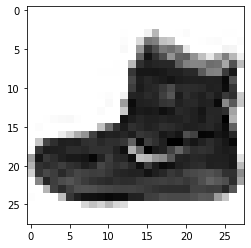

In [20]:
plt.imshow(X_train[0], cmap="binary")

In [24]:
classes = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal",
           "shirt", "sneaker", "bag", "ankle-boot"]

In [25]:
classes[y_train[0]]

'ankle-boot'

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [27]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [29]:
model.layers

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
import pydot
keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [35]:
weights, biases = model.layers[1].get_weights()

In [36]:
weights.shape

(784, 300)

In [37]:
biases.shape

(300,)

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [45]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2286 - accuracy: 0.9176 - val_loss: 0.3154 - val_accuracy: 0.8859
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2193 - accuracy: 0.9203 - val_loss: 0.3200 - val_accuracy: 0.8858
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2139 - accuracy: 0.9254 - val_loss: 0.3190 - val_accuracy: 0.8880
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2136 - accuracy: 0.9234 - val_loss: 0.3285 - val_accuracy: 0.8802
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2109 - accuracy: 0.9251 - val_loss: 0.3254 - val_accuracy: 0.8856
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2066 - accuracy: 0.9282 - val_loss: 0.3421 - val_accuracy: 0.8782
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2002 - accuracy: 0.9291 - val_loss: 0.3355 - val_accuracy:

In [46]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1563}

In [47]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 1.0)

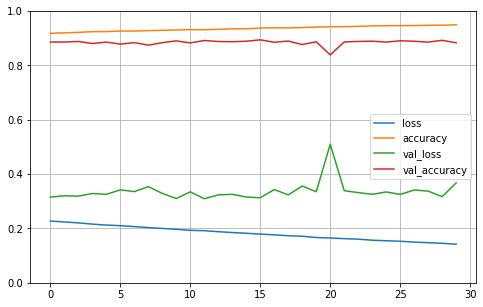

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [53]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 972us/step - loss: 101.0357 - accuracy: 0.8269


[101.03569793701172, 0.8269000053405762]